In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Referred Links:
- https://github.com/krishnaik06/Feature-Engineering-Live-sessions

In [4]:
DATA_PATH = "./titanic.csv"

In [5]:
data = pd.read_csv(DATA_PATH)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
continuous_columns = ["Age", "Fare"]
continuous_data = data[continuous_columns] # data[["Age", "Fare"]]
continuous_data.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


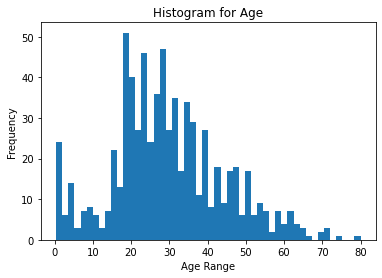

In [13]:
plt.hist(continuous_data["Age"], bins=50)
plt.title("Histogram for Age")
plt.xlabel("Age Range")
plt.ylabel("Frequency")
plt.show()

### Box PLot
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" />

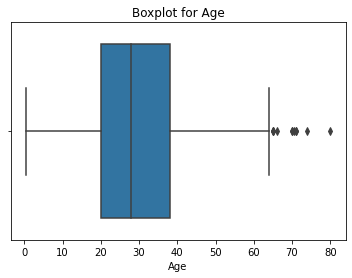

In [15]:
sns.boxplot(continuous_data["Age"])
plt.title("Boxplot for Age")
plt.show()

In [17]:
continuous_data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


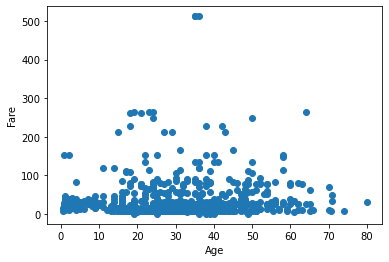

In [19]:
plt.scatter(continuous_data["Age"], continuous_data["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [23]:
survived_counts = data["Survived"].value_counts()
survived_counts

0    549
1    342
Name: Survived, dtype: int64

In [24]:
survived_counts.index, survived_counts.values

(Int64Index([0, 1], dtype='int64'), array([549, 342], dtype=int64))

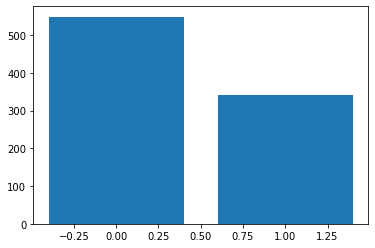

In [25]:
plt.bar(survived_counts.index, survived_counts.values)
plt.show()

In [27]:
continuous_data.isnull().sum()

Age     177
Fare      0
dtype: int64

In [59]:
# random values to impute the missing values in the continous data

In [60]:
# create a seperate column, wherever we find a missing value, represent it with 1 else 0

In [61]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [62]:
# another way of handling the categorical data is, imputing the class names with the frequency of each class

In [64]:
class_counts = data["Pclass"].value_counts()

In [65]:
class_counts.index, class_counts.values

(Int64Index([3, 1, 2], dtype='int64'), array([491, 216, 184], dtype=int64))

In [66]:
zip(class_counts.index, class_counts.values)

In [67]:
class_map = {i:value for i,value in zip(class_counts.index, class_counts.values)}
class_map

{3: 491, 1: 216, 2: 184}

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
data["Pclass"].map(class_map)

0      491
1      216
2      491
3      216
4      491
      ... 
886    184
887    216
888    491
889    216
890    491
Name: Pclass, Length: 891, dtype: int64

In [74]:
data["Age"].max(),data["Age"].min(),

(80.0, 0.42)

In [75]:
data["Age"][0]

22.0

In [76]:
# normalization
(22-18) / (80-18)

0.06451612903225806

In [78]:
data["Age"].mean(), data["Age"].std()

(29.69911764705882, 14.526497332334044)

In [79]:
# standardization
(22-29.69911764705882) / 14.526497332334044

-0.5300050983330725